In [1]:
import numpy as np
import pandas as pd


N_FOLDS = 5

oof_df = pd.read_parquet('cache/new_oof_ensemble.parquet')
print(oof_df.shape)

oof_df.head()

(31992957, 42)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_32,f_33,id,class,begin,end,kfold,predictionstring,idx,overlap
0,1.0,0.183223,0.185430,0.996201,0.996201,0.996201,0.996201,0.996201,0.996201,0.996201,...,0.790287,0.668874,4AB030046F42,Evidence,83,84,0,83,0,0.011628
1,2.0,0.183223,0.187638,0.996201,0.996581,0.996961,0.997341,0.997721,0.998101,0.998481,...,0.790287,0.668874,4AB030046F42,Evidence,83,85,0,83 84,1,0.023256
2,3.0,0.183223,0.189845,0.996201,0.996961,0.997721,0.998481,0.998793,0.999105,0.999417,...,0.790287,0.668874,4AB030046F42,Evidence,83,86,0,83 84 85,2,0.034884
3,4.0,0.183223,0.192053,0.996201,0.997341,0.998481,0.998949,0.999417,0.999611,0.999805,...,0.790287,0.668874,4AB030046F42,Evidence,83,87,0,83 84 85 86,3,0.046512
4,5.0,0.183223,0.194260,0.996201,0.997721,0.998793,0.999417,0.999583,0.999712,0.999805,...,0.790287,0.668874,4AB030046F42,Evidence,83,88,0,83 84 85 86 87,4,0.058140


In [2]:
gt_df = pd.read_csv("../train_folds.csv")
print(gt_df.shape)
gt_df.head()

(144293, 9)


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,kfold
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,1
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,1
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75,1
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...,1
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...,1


In [3]:
oof_df = oof_df.drop("kfold", axis=1).merge(gt_df[["id", "kfold"]].drop_duplicates(), on="id", how="left")

oof_df["kfold"].isnull().mean()

0.0

In [4]:
from utils import score_feedback_comp


score_feedback_comp(oof_df[oof_df["f_7"] > 0.9999], gt_df, return_class_scores=True)

(0.0033459303983092437,
 {'Claim': 0.0,
  'Concluding Statement': 0.0,
  'Counterclaim': 0.0,
  'Evidence': 0.010674047795407586,
  'Lead': 0.012747464992757121,
  'Position': 0.0,
  'Rebuttal': 0.0})

In [5]:
oof_df["begin"] = oof_df["predictionstring"].apply(lambda x: int(str(x).split()[0]))
#oof_df["end"] = oof_df["predictionstring"].apply(lambda x: int(str(x).split()[-1]))
#oof_df["len"] = oof_df["end"] - oof_df["begin"] + 1
#oof_df["loc"] = (oof_df["begin"] + oof_df["end"]) / 2

oof_df = oof_df.sort_values(["id", "begin"]).reset_index(drop=True)
oof_df.head(20)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_32,f_33,id,class,begin,end,predictionstring,idx,overlap,kfold
0,1.0,0.0,0.003984,0.934854,0.934854,0.934854,0.934854,0.934854,0.934854,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,1,0,23028993,0.0,3
1,2.0,0.0,0.007968,0.835279,0.851875,0.868470,0.885066,0.901662,0.918258,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,2,0 1,23028994,0.0,3
2,3.0,0.0,0.011952,0.835279,0.841012,0.846746,0.852479,0.879938,0.907396,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,3,0 1 2,23028995,0.0,3
3,4.0,0.0,0.015936,0.835279,0.843879,0.852479,0.859843,0.867206,0.901030,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,4,0 1 2 3,23028996,0.0,3
4,5.0,0.0,0.019920,0.835279,0.846746,0.857388,0.867206,0.870778,0.893327,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,5,0 1 2 3 4,23028997,0.0,3
5,6.0,0.0,0.023904,0.835279,0.849613,0.862297,0.867804,0.869789,0.882945,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,6,0 1 2 3 4 5,23028998,0.0,3
6,7.0,0.0,0.027888,0.835279,0.852479,0.863708,0.867206,0.868401,0.872564,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,7,0 1 2 3 4 5 6,23028999,0.0,3
7,8.0,0.0,0.031873,0.835279,0.854351,0.864874,0.867804,0.870732,0.872453,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,8,0 1 2 3 4 5 6 7,23029000,0.0,3
8,9.0,0.0,0.035857,0.835279,0.856222,0.866040,0.868401,0.871124,0.872342,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,9,0 1 2 3 4 5 6 7 8,23029001,0.0,3
9,10.0,0.0,0.039841,0.835279,0.858094,0.867206,0.869229,0.870736,0.872231,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,10,0 1 2 3 4 5 6 7 8 9,23029002,0.0,3


In [6]:
oof_df["target"] = oof_df["overlap"] >= 0.5
oof_df["target"].mean()

0.35639825352811244

In [7]:
discourse_types = gt_df["discourse_type"].unique()

In [8]:
from tqdm import tqdm
import os

def read_texts(directory):
    names, texts = [], []
    for f in tqdm(list(os.listdir(directory))):
        names.append(f.replace('.txt', ''))
        texts.append(open(directory + f, 'r').read())
    df = pd.DataFrame({'id': names, 'full_text': texts})
    return df

#text_df = read_texts("data/train/")
#print(text_df.shape)
#text_df["full_text_len"] = text_df["full_text"].apply(lambda x: len(x.split()))
#text_df.head()

#oof_df = oof_df.merge(text_df, on="id", how="left")

In [9]:
features_dict = {'Lead': [f"f_{i}" for i in range(34)],
 'Position': [f"f_{i}" for i in range(34)],
 'Evidence': [f"f_{i}" for i in range(20)],
 'Claim': [f"f_{i}" for i in range(20)],
 'Concluding Statement': [f"f_{i}" for i in range(34)],
 'Counterclaim': [f"f_{i}" for i in range(17)] + [f"f_{i}" for i in range(27, 34)],
 'Rebuttal': [f"f_{i}" for i in range(17)]}


target = "target"

In [10]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, f1_score
import os

os.system('mkdir gbm_models')

lgb_param = {"objective": "binary",
             "metric": 'auc',
             "boosting": "dart",
             "learning_rate": 0.1,
             "is_unbalance": True,
                    "min_data_in_leaf": 200,
                    "num_leaves": 15,
                    "feature_fraction": 0.8,
             "subsample": 0.5,
             "subsample_freq": 1
                    }


xgb_param = {'objective': 'reg:logistic',
         'eval_metric': "auc",
         'learning_rate': 0.05,
         'max_depth': 4,
         "min_child_weight": 200,
         "colsample_bynode": 0.8,
         "subsample": 0.5,
         "tree_method": 'gpu_hist', "gpu_id": 0
    }

y_oof = np.zeros(oof_df.shape[0])
res = dict()
best_th = dict()

lvl1_stacking_df = []

for dtype in discourse_types:
    if dtype == "Evidence":
        lgb_param["boosting"] = "gbdt"
        lgb_param["learning_rate"] = 0.05
    else:
        lgb_param["boosting"] = "dart"
        lgb_param["learning_rate"] = 0.1
        
        
    features = features_dict[dtype]

    
    all_indices = np.where(oof_df["class"] == dtype)[0]
    discourse_df = oof_df[oof_df["class"] == dtype].reset_index(drop=True)
    
    tm = discourse_df["target"].mean()
    
    xgb_param["scale_pos_weight"] = (1 - tm)/tm
    
    best_its = []
    
    print(dtype, len(features))
    for f in range(N_FOLDS):
        val_ind = all_indices[np.where(discourse_df["kfold"] == f)[0]]
        train_df, val_df = discourse_df[discourse_df["kfold"] != f], discourse_df[discourse_df["kfold"] == f]

        d_train = xgb.DMatrix(train_df[features], train_df[target])
        d_val = xgb.DMatrix(val_df[features], val_df[target])

        model = xgb.train(xgb_param, d_train, evals=[(d_val, "val")], num_boost_round=2000, verbose_eval=200, 
                          early_stopping_rounds=50)
        model.save_model(f'gbm_models/xgb_{dtype}_{f}.json')

        y_oof[val_ind] = 0.5*model.predict(d_val)
        best_its.append(model.best_iteration)


        lgb_train = lgb.Dataset(train_df[features].astype("float32"), train_df["target"].astype("float32"))
        lgb_val = lgb.Dataset(val_df[features].astype("float32"), val_df["target"].astype("float32"))

        model = lgb.train(lgb_param, lgb_train, num_boost_round=int(best_its[-1]*1.4), valid_sets=[lgb_val],
                          verbose_eval=200)
        model.save_model(f'gbm_models/lgb_{dtype}_{f}.txt')
        y_oof[val_ind] += 0.5*model.predict(val_df[features].astype("float32"))


        print("...")
        
    discourse_df["prob"] = y_oof[all_indices]
    discourse_df = discourse_df.sort_values(["id", "prob"], ascending=False).reset_index(drop=True)
    
    print("removing overlaps...")
    
    pred_df = []
    prev_id = -1
    overlap_array = np.zeros(4096)
    for id, ps, cls, prob, overlap in zip(discourse_df["id"].values, discourse_df["predictionstring"].values,
                                 discourse_df["class"].values, discourse_df["prob"].values,
                                 discourse_df["overlap"].values):
        if id != prev_id:
            prev_id = id
            overlap_array = np.zeros(4096)
        
        ps_list = ps.split()
        begin, end = int(ps_list[0]), int(ps_list[-1]) + 1
        
        intersect = np.sum(overlap_array[begin:end])
        total = end - begin
        
        condition = intersect/total <= 0.15
        
        if condition:
            pred_df.append({"id": id, "class": cls, "prob": prob, "predictionstring": ps, "overlap": overlap})
            overlap_array[begin:end] = 1
    
    pred_df = pd.DataFrame(pred_df)
    lvl1_stacking_df.append(pred_df)
    print("tuning...")
    
    thresholds = np.arange(10, 90, 1)/100
    
    all_gt = gt_df[gt_df["discourse_type"] == dtype].shape[0]
    print(pred_df.shape, all_gt)
    f1s = []
    for t in thresholds:
        tp = (pred_df[pred_df["prob"] > t]["overlap"] >= 0.5).sum()
        fp = (pred_df[pred_df["prob"] > t]["overlap"] < 0.5).sum()
        fn = all_gt - tp
        
        f1 = tp / (tp + (fp + fn)/2)
        
        #print(t, tp, fp, fn)
        
        f1s.append(f1)

    best_ind = np.argmax(f1s)
    print()
    print(thresholds[best_ind], f1s[best_ind])
    print()
    
    best_th[dtype] = thresholds[best_ind]
    res[dtype] = f1s
    
    
    #d_train = xgb.DMatrix(discourse_df[features], discourse_df[target])
    #model = xgb.train(param, d_train, num_boost_round=int(np.mean(best_its)*1.2))
    #model.save_model(f'models/xgb_{dtype}.json')


mkdir: cannot create directory ‘gbm_models’: File exists


Lead 34
[0]	val-auc:0.92984
[200]	val-auc:0.96178
[400]	val-auc:0.96282
[507]	val-auc:0.96290


/home/exx/.conda/envs/torch/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 528393, number of negative: 1071022
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8443
[LightGBM] [Info] Number of data points in the train set: 1599415, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330366 -> initscore=-0.706528
[LightGBM] [Info] Start training from score -0.706528
[200]	valid_0's auc: 0.962575
[400]	valid_0's auc: 0.963113
[600]	valid_0's auc: 0.962662
...
[0]	val-auc:0.93488
[200]	val-auc:0.96381
[400]	val-auc:0.96472
[473]	val-auc:0.96469
[LightGBM] [Info] Number of positive: 531235, number of negative: 1076718
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory i

[200]	valid_0's auc: 0.848422
[400]	valid_0's auc: 0.85333
[600]	valid_0's auc: 0.8551
[800]	valid_0's auc: 0.855887
[1000]	valid_0's auc: 0.856745
[1200]	valid_0's auc: 0.857343
[1400]	valid_0's auc: 0.857788
[1600]	valid_0's auc: 0.85808
[1800]	valid_0's auc: 0.858293
[2000]	valid_0's auc: 0.858524
[2200]	valid_0's auc: 0.858575
[2400]	valid_0's auc: 0.858702
[2600]	valid_0's auc: 0.858911
...
[0]	val-auc:0.77156
[200]	val-auc:0.85047
[400]	val-auc:0.85575
[600]	val-auc:0.85819
[800]	val-auc:0.86009
[1000]	val-auc:0.86134
[1200]	val-auc:0.86218
[1400]	val-auc:0.86274
[1600]	val-auc:0.86330
[1800]	val-auc:0.86368
[1999]	val-auc:0.86381
[LightGBM] [Info] Number of positive: 6610971, number of negative: 9771960
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5099
[LightGBM] [Info]

[200]	valid_0's auc: 0.853034
[400]	valid_0's auc: 0.857495
[600]	valid_0's auc: 0.859171
[800]	valid_0's auc: 0.860375
[1000]	valid_0's auc: 0.860983
[1200]	valid_0's auc: 0.861091
[1400]	valid_0's auc: 0.861514
[1600]	valid_0's auc: 0.861757
...
[0]	val-auc:0.78869
[200]	val-auc:0.85313
[400]	val-auc:0.85750
[600]	val-auc:0.85906
[800]	val-auc:0.86005
[1000]	val-auc:0.86061
[1200]	val-auc:0.86096
[1400]	val-auc:0.86122
[1525]	val-auc:0.86129
[LightGBM] [Info] Number of positive: 891769, number of negative: 1868511
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4887
[LightGBM] [Info] Number of data points in the train set: 2760280, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.323072 -> initscore=-0.739690
[LightGBM] [Info] Start training from sc

[200]	valid_0's auc: 0.893421
...
[0]	val-auc:0.88835
[200]	val-auc:0.90514
[204]	val-auc:0.90519
[LightGBM] [Info] Number of positive: 160755, number of negative: 851183
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5961
[LightGBM] [Info] Number of data points in the train set: 1011938, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158859 -> initscore=-1.666746
[LightGBM] [Info] Start training from score -1.666746
[200]	valid_0's auc: 0.904364
...
[0]	val-auc:0.88757
[181]	val-auc:0.90575
[LightGBM] [Info] Number of positive: 161159, number of negative: 867131
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not en

In [11]:
best_th

{'Lead': 0.6,
 'Position': 0.52,
 'Evidence': 0.55,
 'Claim': 0.55,
 'Concluding Statement': 0.52,
 'Counterclaim': 0.69,
 'Rebuttal': 0.71}

In [12]:
{k: np.mean(v) for k, v in res.items()}

{'Lead': 0.8668202643274835,
 'Position': 0.7507901765078955,
 'Evidence': 0.7594494276051763,
 'Claim': 0.6665954187497375,
 'Concluding Statement': 0.8681841708758448,
 'Counterclaim': 0.5529634160161236,
 'Rebuttal': 0.4623768075463306}

In [13]:
lvl1_stacking_df = pd.concat(lvl1_stacking_df)
lvl1_stacking_df.shape

(199404, 5)

In [14]:
score_feedback_comp(lvl1_stacking_df[lvl1_stacking_df["prob"] > lvl1_stacking_df["class"].map(best_th)], 
                    gt_df, return_class_scores=True)

(0.7317220596619645,
 {'Claim': 0.6898807468053553,
  'Concluding Statement': 0.878745490686888,
  'Counterclaim': 0.6028159221275856,
  'Evidence': 0.7799607733258616,
  'Lead': 0.875086634323186,
  'Position': 0.7641899718682773,
  'Rebuttal': 0.5313748784965979})

In [15]:
len(oof_df["id"].unique())

15594

In [16]:
len(gt_df["id"].unique())

15594

In [17]:
lvl1_stacking_df.to_parquet("gbm_models/level1_oof.parquet", index=False)

In [18]:
lvl1_stacking_df.sort_values("prob")

,id,class,prob,predictionstring,overlap
41518,4DA58F8F319A,Evidence,0.000026,215,0.002950
53201,1BA91BC3D89A,Evidence,0.000040,631,0.004878
5913,A3E66DCF8B6E,Concluding Statement,0.000046,270,0.000000
18548,B0C685E8EA1A,Evidence,0.000047,469,0.014925
7110,E1DA1E513BE1,Evidence,0.000050,73,0.000000
...,...,...,...,...,...
6487,9AEE597CBE7E,Concluding Statement,0.998990,377 378 379 380 381 382 383 384 385 386 387 38...,0.883117
8421,7D92AFA8EB0C,Concluding Statement,0.999014,275 276 277 278 279 280 281 282 283 284 285 28...,0.873239
3347,CBA185D3B277,Concluding Statement,0.999021,282 283 284 285 286 287 288 289 290 291 292 29...,1.000000
4223,BDE4475D7290,Concluding Statement,0.999104,292 293 294 295 296 297 298 299 300 301 302 30...,0.987805


<AxesSubplot:xlabel='threshold'>

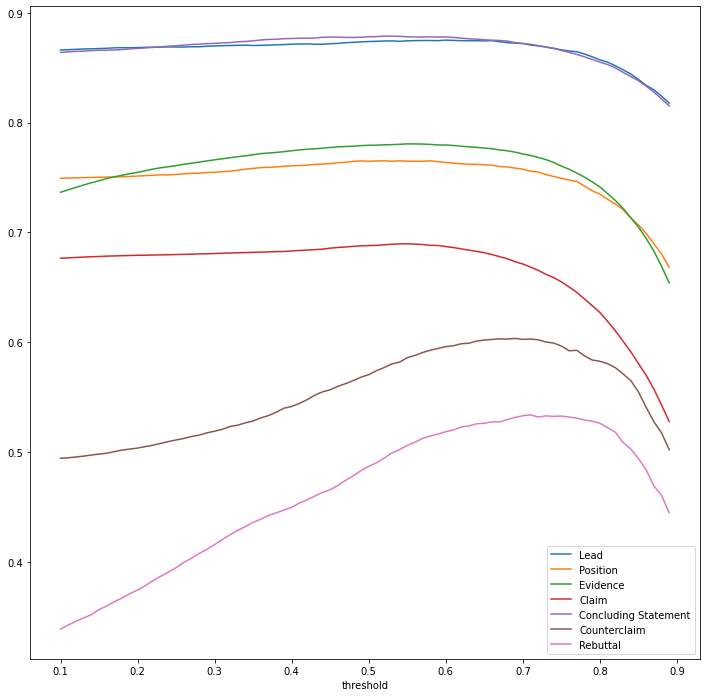

In [19]:
th_df = pd.DataFrame()

for k, v in res.items():
    th_df[k] = v
    
th_df["threshold"] = np.arange(10, 90, 1)/100

th_df.plot(figsize=(12, 12), x="threshold")